# Titanic Dataset Kaggle Competition

## Question/Problem Definition

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Prepare the notebook

The necessary packages needed to build the analysis is imported into the notebook

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import random as rnd

# Importing visualization packages~
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing machine learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

C:\Users\INYANG\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Acquire training and testing data

The training and test data are contained in the root folder of the notebook and imported into the notebook as Pandas dataframes

In [2]:
all =  pd.read_csv('titanic.csv')
df_train = pd.read_csv('titanic.csv').head(600)
df_test = pd.read_csv('titanic.csv').tail(280)
combine = [df_train, df_test]

In [5]:
# df_train.info()
all.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
all.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gustafsson, Mr. Alfred Ossian",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
all.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [318]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,600.000000,600.000000,600.000000,474.000000,600.000000,600.000000,600.000000
mean,300.500000,0.393333,2.308333,29.782700,0.538333,0.375000,31.846034
std,173.349358,0.488897,0.835320,14.535148,1.097210,0.773761,46.286301
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,150.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,300.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,450.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,600.000000,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


In [319]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,600,600,600,137,599
unique,600,2,493,104,3
top,"Asim, Mr. Adola",male,347082,C23 C25 C27,S
freq,1,377,4,4,428


## Analyze, identify patterns, and explore the data


The variables available to us have the following descriptors which explain to us what they mean.

- Survived: Survived (1) or died (0)
- Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

### Expected survival for different features

Effect of different features on survivablitiy is first tested between different columns and the Survived column which indicates the survival of the passenger. The factors likely to be involved in the survival of the passenger:
- Passenger Class (Pclass)
- Sex of the passenger (Sex)
- Family members on the ship (SibSp and Parch)

In [320]:
x = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# df_train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Fare', ascending=False)
# df_train.groupby(['Embarked'], as_index=False).count()#.sort_values(by='Fare', ascending=False)
# 
x

,Pclass,Survived
0,1,0.593103
1,2,0.504000
2,3,0.263636


In [321]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.748879
1,male,0.183024


In [322]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.538462
2,2,0.400000
0,0,0.358911
3,3,0.250000
4,4,0.230769
5,5,0.000000
6,8,0.000000


In [323]:
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
2,2,0.542373
3,3,0.500000
5,5,0.500000
1,1,0.493333
0,0,0.360262
4,4,0.000000


## Analyzing data by visualizing it

For us to understand who would have survived this disaster better, we should visualize the patients who survived based on age, passenger class and etc.

### Number of people who survived distributed over age

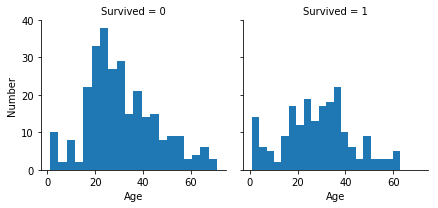

In [324]:
age_hist = sns.FacetGrid(df_train, col='Survived')
age_hist.map(plt.hist, 'Age', bins=20)
age_hist.set_ylabels('Number')

We can tell that amongst those who survived (Survived = 1), the number of infants (Age: 0-4) is higher than passengers below the age of 20

### Number of people who survived over age and passenger class

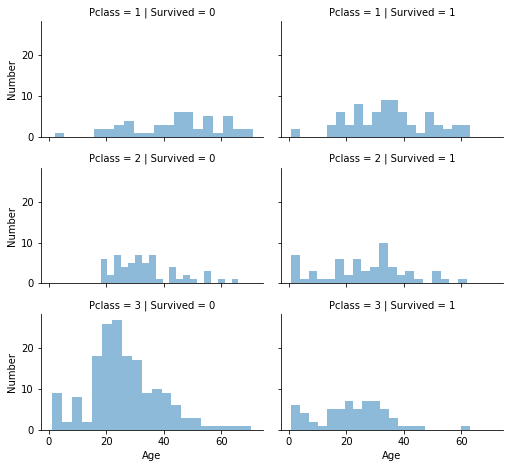

In [325]:
pclass_age_grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
# pclass_age_grid.add_legend()
pclass_age_grid.set_ylabels('Number')

The casualties of passenger who were in Passenger Class 3 are significantly more than the casualties in other passenger classes.

### Survival rate of passengers amongst each sex for each embarking zone

The rate of survival of passengers in each embarking zone distributed over sex

In [326]:
# grid = sns.FacetGrid(df_train, row='Embarked', height=2.8, aspect=2)
# grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
# grid.add_legend()

The survivors of female passengers was more amongst those passengers who embarked on S and Q but not in C

### Fare Analysis of passengers who survived based on Embarking Zone

Analysis of the fare paid by passengers who survived or did not, based on their embarking zone and sex

C:\Users\INYANG\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\INYANG\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


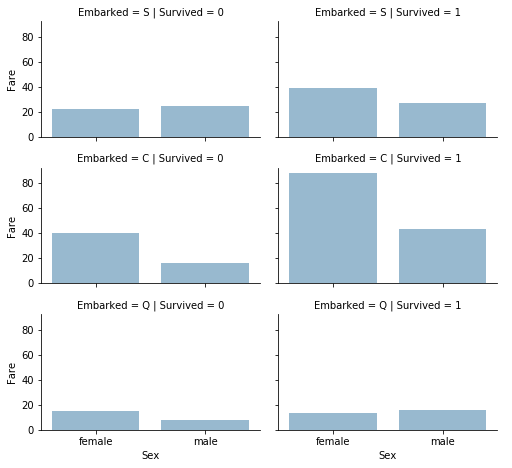

In [327]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

- Diff of proportions is significant

## Wrangle, prepare, cleanse the data

### Dropping irrelevant columns in data

We can see through describing the data that the 'Ticket' column and the 'Cabin' column are alphanumeric, have duplicates and do not have much information about the survival rates of the passenger

In [328]:
df_train = df_train.drop(['Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Ticket', 'Cabin'], axis=1)
combine = [df_train, df_test]

### Extracting a feature from given column

This is done to extract the title of the passenger from the name column so we have an idea who the passenger will be in society

In [329]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
# titles = df_train.Name.str.extract('([A-Za-z]+)\.', expand=False)
# df_train["Title"] = titles
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Don,0,1
Dr,0,3
Lady,1,0
Major,0,2
Master,0,27
Miss,135,0
Mme,1,0
Mr,0,340
Mrs,85,0


By combining different titles that mean the same and splitting the title of each person by their role and status
- Mlle means 'Mademoiselle' which is the honorific used to describe someone who would be called 'Miss' in France
- Mme means 'Madame' which is the honorific used to describe someone who would be called 'Mrs' in France
- Ms is the short form for 'Miss'
- Lady, Countess, Dona are female honorifics of nobility
- Don, Sir, Jonkheer are male honorifics of nobility
- Capt refers to the Captain of the Titanic; Col, Major are military positions; Dr are doctors, Rev is a Reverend who all have special roles in society

In [330]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Don', 'Sir', 'Jonkheer', 'Dona'],'Royalty')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col','Dr','Major','Rev'],'Special')

df_train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.518519
1,Miss,0.705882
2,Mr,0.155882
3,Mrs,0.813953
4,Royalty,0.666667
5,Special,0.125000


For feature mapping each title with the likelyhood of the passenger's survival, we can map these titles as numbers for our learning algorithms to be able to use these columns to predict whether the passenger survived

In [331]:
title_mapping = {"Master": 1, "Miss": 2, "Mrs": 3, "Mr": 4, "Royalty": 5, "Special": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,4


Since we have extracted the features out of the name, we do not have the need to uniquely identify the passengers with their name and passengerId, so we could drop those columns

In [332]:
df_train = df_train.drop(['Name', 'PassengerId'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
combine = [df_train, df_test]

### Converting a simple category into a feature

For our learning algorithms to train better on this data, let us map female to 0 and male to 1 for the 'Sex' column

In [333]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,4
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,4


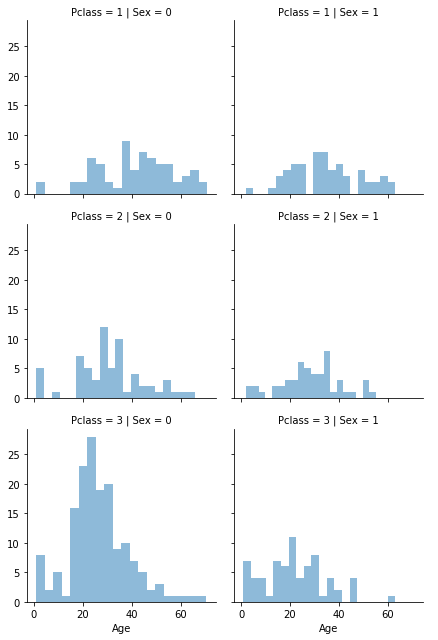

In [334]:
pclass_sex_age_grid = sns.FacetGrid(df_train, row='Pclass', col='Sex')
pclass_sex_age_grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
pclass_sex_age_grid.add_legend()

### Populating null values with predicted data

Checking the number of values in the training data with null values in the Age column

In [335]:
df_train.Age.isnull().sum()

126

Coming up with median age based on passenger class and sex

In [336]:
median_age = np.zeros((2,3))
for dataset in combine:
    for sex in range(0,2):
        for pclass in range(0,3):
            guess_df = dataset[(dataset['Sex'] == sex) & \
                                  (dataset['Pclass'] == pclass+1)]['Age'].dropna()
            age_guess = guess_df.median()
            median_age[sex,pclass] = age_guess
median_age

array([[38.5, 28. , 25. ],
       [33. , 29. , 18. ]])

Replacing null values of Age with median age for the passenger's class and sex

In [337]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = median_age[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,4
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,4


## Making a feature out of a column with continuous numerical value

Splitting the ages of the training data into 5 parts to split a continuous numerical value (age) into bands (i.e age bands)

In [338]:
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.071, 14.2]",0.576923
1,"(14.2, 28.4]",0.326460
2,"(28.4, 42.6]",0.479532
3,"(42.6, 56.8]",0.338710
4,"(56.8, 71.0]",0.333333


Encode the age band that we have calculated as AgeG which indicates age group

In [339]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'AgeG'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'AgeG'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'AgeG'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'AgeG'] = 3
    dataset.loc[ dataset['Age'] > 64, 'AgeG'] = 4

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,AgeG
0,0,3,0,22,1,0,7.2500,S,4,"(14.2, 28.4]",1.0
1,1,1,1,38,1,0,71.2833,C,3,"(28.4, 42.6]",2.0
2,1,3,1,26,0,0,7.9250,S,2,"(14.2, 28.4]",1.0
3,1,1,1,35,1,0,53.1000,S,3,"(28.4, 42.6]",2.0
4,0,3,0,35,0,0,8.0500,S,4,"(28.4, 42.6]",2.0


One we are done with the making the age feature into the groups we can lose those features

In [340]:
df_train = df_train.drop(['AgeBand','Age'], axis=1)
combine = [df_train, df_test]
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeG
0,0,3,0,1,0,7.2500,S,4,1.0
1,1,1,1,1,0,71.2833,C,3,2.0
2,1,3,1,0,0,7.9250,S,2,1.0
3,1,1,1,1,0,53.1000,S,3,2.0
4,0,3,0,0,0,8.0500,S,4,2.0


## Combining features to create a new feature

Let us create a feature FamilySize by combining the SibSp and Parch columns which indicate the number of siblings and parent/children that the passenger had on the Titanic to form the FamilySize feature

In [341]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.666667
2,3,0.608108
1,2,0.521739
6,7,0.444444
0,1,0.320113
5,6,0.214286
4,5,0.083333
7,8,0.000000
8,11,0.000000


Let us drop the SibSp and Parch columns since we have included them into our FamilySize feature

In [342]:
df_train = df_train.drop(['SibSp', 'Parch'], axis=1)
df_test = df_test.drop(['SibSp','Parch'], axis=1)
combine = [df_train, df_test]

df_train.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,AgeG,FamilySize
0,0,3,0,7.2500,S,4,1.0,2
1,1,1,1,71.2833,C,3,2.0,2
2,1,3,1,7.9250,S,2,1.0,1
3,1,1,1,53.1000,S,3,2.0,2
4,0,3,0,8.0500,S,4,2.0,1


### Converting a categorical feature into a numeric feature

In order to convert the 'Embarked' feature into a numeric feature we need to fill in the null values of the column with actual data, so we are finding the most common value in this column by generating the mode of the data. The 

In [343]:
freq_port = df_train.Embarked.dropna().mode()
freq_port

0    S
dtype: object

Replacing the value of the 'Embarked' column in the data with the most common embarked port, is denoted by 'S'

In [344]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

df_train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.521368
1,Q,0.462963
2,S,0.348131


Let us now map each of the 'Embarked' ports into numerical values to convert it into a numeric feature

In [391]:
# for dataset in combine:
#     dataset['Embarked'] = dataset['Embarked'].astype(int)

# df_train[df_train.Embarked.isnull()].Embarked = 1.0#.head()
df_train.info()
# df_train.info()#.loc[61, 'Embarked']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
Survived      600 non-null int64
Pclass        600 non-null int64
Sex           600 non-null int32
Embarked      600 non-null int32
Title         600 non-null int64
AgeG          600 non-null int32
FamilySize    600 non-null int64
dtypes: int32(3), int64(4)
memory usage: 25.9 KB


We are dropping the 'Fare' column because we are assuming that the passenger class column is indicatory of the price of the ticket. This is done to simplify the analysis

In [393]:
df_train = df_train.drop(['Fare'], axis=1)
df_test = df_test.drop(['Fare'], axis=1)
combine = [df_train, df_test]

df_train.head()

KeyError: "['Fare'] not found in axis"

Fixing the age group column so all the values are int

In [394]:
for dataset in combine:
    dataset.AgeG = dataset.AgeG.astype(int)
df_train.head()

,Survived,Pclass,Sex,Embarked,Title,AgeG,FamilySize
0,0,3,0,0,4,1,2
1,1,1,1,1,3,2,2
2,1,3,1,0,2,1,1
3,1,1,1,0,3,2,2
4,0,3,0,0,4,2,1


In [395]:
# df_test = df_test.drop(['Age'], axis=1)
# df_test.head()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
Survived      600 non-null int64
Pclass        600 non-null int64
Sex           600 non-null int32
Embarked      600 non-null int32
Title         600 non-null int64
AgeG          600 non-null int32
FamilySize    600 non-null int64
dtypes: int32(3), int64(4)
memory usage: 25.9 KB


## Model, predict and solve the problem

The problem that we are left to solve is to predict whether the passenger survives the Titanic or not, which is a classification problem. We are also given the columns that can be correlated to the survival of the passenger. We intend to do supervised learning plus classification and regression on a given set of features that we have extracted from the data. We will use the following methods in order to build our analysis

- Logistic Regression
- Support Vector Machines
- KNN or K-Nearest Neighbors
- Decision Trees
- Random Forest

Before we implement our models and predict the survivors, we should clean our train and test data in order to be able to fit in the various classifiers available to us in the sci-kit learn package

In [396]:
X_train = df_train.drop("Survived", axis=1)
X_train.head()

,Pclass,Sex,Embarked,Title,AgeG,FamilySize
0,3,0,0,4,1,2
1,1,1,1,3,2,2
2,3,1,0,2,1,1
3,1,1,0,3,2,2
4,3,0,0,4,2,1


In [397]:
Y_train = df_train['Survived']
X_test = df_test.drop('PassengerId', axis=1).drop('Survived', axis=1).copy()
X_test.head(5)

,Pclass,Sex,Age,Embarked,Title,AgeG,FamilySize
611,3,0,25,0.0,4,1,1
612,3,1,18,2.0,2,1,2
613,3,0,25,2.0,4,1,1
614,3,0,35,0.0,4,2,1
615,2,1,24,0.0,2,1,4


### Logistic regression

In [398]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train,Y_train)*100, 2)
acc_log

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Using the logistic regressor we can find out the correlations between different columns within the data towards increasing the survival of a passenger

In [117]:
coeff_df = pd.DataFrame(df_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(log_reg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

We can hence concluded Sex being female (Sex=1) is a major determining factor in the survial of the passenger. We can also conclude that as the passenger class number increase, it reduces the chance of survival of the passenger which means (Pclass = 3 < Pclass = 2 < Pclass = 1)

### Support Vector Machines

Support vector machines are supervised learning models that are used for classification and regression analysis and is mainly used to differentiate between two categories, for which it builds a model and assigns new test samples to either category, making it a non-probabilitistic linear classifer

In [67]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svm = round(svc.score(X_train, Y_train) *100 ,2)
acc_svm

83.17

### K-Nearest Neighbors or KNNs

K-Nearest Neighbors classifier classifies samples based on the number of nearest neighbor samples k which are under one category, when there are samples which are close to the the value which defines the problem space they are classified under that value.

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) *100, 2)
acc_knn

84.67

### Decision Trees

Decision Trees are classifiers which map features as tree branches to finally come to a conclusive value which is denoted by the leaf of the tree. Tree models generally take a finite set of values and these trees are known as classification trees. The branches in the tree represent the decision based branches based on features available and the leaves of the tree represent the values that are derived from the conclusion of decisions made on those features

In [69]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
acc_tree = round(tree.score(X_train, Y_train)*100, 2)
acc_tree

86.83

### Random Forest

Random forest classifiers are classifiers which create multiple decision trees for the problem space in training and outputting the class that is mostly predicted by each individual tree, or the mean prediction amongst the individual trees

In [70]:
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
Y_pred = forest.predict(X_test)
acc_forest = round(forest.score(X_train, Y_train) *100 , 2)
acc_forest


86.0

## Problem solving report and final solution


In [193]:
model = pd.DataFrame({'Method': ['Logistic Regression','SVM','KNN','Decision Trees','Random Forest'], 'Score': [acc_log, acc_svm, acc_knn, acc_tree, acc_forest]})
model.sort_values(by='Score', ascending=False)



,Method,Score
3,Decision Trees,86.83
4,Random Forest,86.50
2,KNN,84.67
1,SVM,83.17
0,Logistic Regression,80.00


As we can see, the decision tree classifer outputs a 86.2% accuracy on the test set and is the most successful model for the set of features and the model that we have built.

## Supply or submit the results.


To submit the results, build a dataframe to contain your values and use the to_csv function to output a csv file

In [61]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic/submission.csv', index=False)